In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def twotheta_q(twotheta):
    return (4*np.pi/1.5406)*np.sin(twotheta*np.pi/360)

In [3]:
# Define a function to scrape data from the .asc files

def read_asc(filename):

    # Open the file and read the data
    with open(filename, 'r') as f:
        data = f.readlines()
        for item in data:
            item = item.rstrip()

        # Remove blank lines and spaces
        cleaned_data = [item.split() for item in data if item.split()]

        # Loop through the find start and stop of data in theta and line indices
        for idx, line in enumerate(cleaned_data):
            if line[0] == '*START':
                start = line[-1]

            elif line[0] == '*STOP':
                end = line[-1]

            elif line[0] == '*COUNT':
                start_idx = idx + 1
                num_vals = line[-1]

            elif line[0] == '*END':
                end_idx = idx

        # Combine data lines into a list
        data = cleaned_data[start_idx]
        for i in range(start_idx+1, end_idx):
            data += cleaned_data[i]

        #Removes commas from list entries & convert to float array
        for i in range(len(data)):
            data[i] = data[i].replace(',','')
        data = np.array(data).astype(float)

        theta_values = np.linspace(int(start), int(end), int(num_vals))
        q_values = twotheta_q(theta_values)

        return [data, theta_values, q_values]

        
        


In [4]:
zn13x = read_asc('Zn13Xhighres_2-Theta_Omega.asc')
zn13x15 = read_asc('Zn13X15minhighres_2-Theta_Omega.asc')
pure_13x = read_asc('13Xhighres_2-Theta_Omega.asc')
empty_cap = read_asc('empty_cap_2-Theta_Omega.asc')

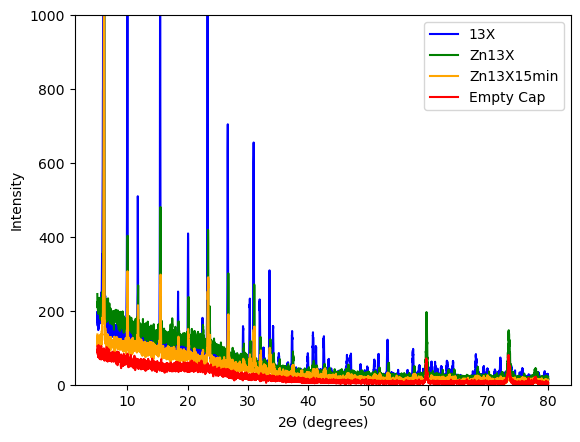

In [5]:
# Plot all graphs in 2-theta space

plt.plot(pure_13x[1], pure_13x[0], label='13X',marker='',linestyle='-',color='blue')
plt.plot(zn13x[1],zn13x[0],label='Zn13X',marker='',linestyle='-',color='green')
plt.plot(zn13x15[1],zn13x15[0],label='Zn13X15min',marker='',linestyle='-',color='orange')
plt.plot(empty_cap[1],empty_cap[0],label='Empty Cap',marker='',linestyle='-',color='red')
plt.ylim(0,1000)
plt.xlabel("2$\Theta$ (degrees)")
plt.ylabel("Intensity")
plt.legend()
plt.show()



In [6]:
# Normalise - remove background capillary scattering

pure_13x_norm = pure_13x[0] - empty_cap[0]
zn13x_norm = zn13x[0] - empty_cap[0]
zn13x15_norm = zn13x15[0] - empty_cap[0]

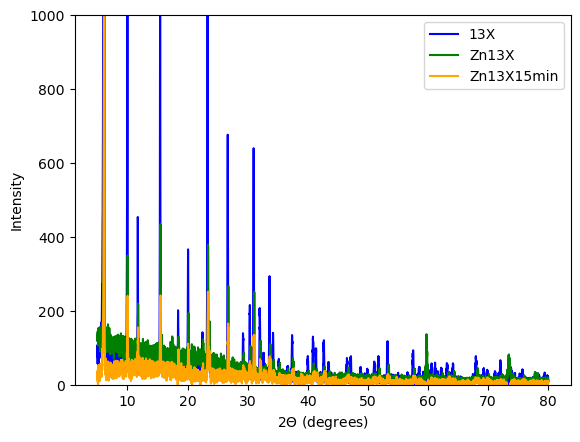

In [7]:
plt.plot(pure_13x[1], pure_13x_norm, label='13X',marker='',linestyle='-',color='blue')
plt.plot(zn13x[1],zn13x_norm,label='Zn13X',marker='',linestyle='-',color='green')
plt.plot(zn13x15[1],zn13x15_norm,label='Zn13X15min',marker='',linestyle='-',color='orange')
# plt.xlim(5,50)
plt.ylim(0,1000)
plt.xlabel("2$\Theta$ (degrees)")
plt.ylabel("Intensity")
plt.legend()
plt.show()

In [10]:
zn_peaks = [1.101,1.429,1.656,1.675,1.890, 2.068, 2.144, 2.187, 2.258, 2.370, 2.410, 2.625, 2.857]
na_peaks = [1.096, 1.306, 1.423, 1.651, 1.883, 2.059, 2.137, 2.180,2.251, 2.360, 2.401, 2.791, 2.848, 2.881,2.967]